## Used Car Price Predictor

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset
df = pd.read_csv("/Users/1998a/Downloads/archive/cars.csv")

In [4]:
# top 5 records
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


In [5]:
# shape of data
df.shape

(56244, 12)

In [6]:
df.isna().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1905
segment                5291
dtype: int64

In [7]:
max = df["drive_unit"].value_counts(ascending=False).index[0]
df["drive_unit"].fillna(max, inplace=True)

max2 = df["volume(cm3)"].value_counts(ascending=False).index[0]
df["volume(cm3)"].fillna(max2, inplace=True)

max3 = df["segment"].value_counts(ascending=False).index[0]
df["segment"].fillna(max3, inplace=True)

In [8]:
# Check for duplicates and remove
df.duplicated().sum()
df = df.drop_duplicates()

In [9]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56153 entries, 0 to 56243
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 56153 non-null  object 
 1   model                56153 non-null  object 
 2   priceUSD             56153 non-null  int64  
 3   year                 56153 non-null  int64  
 4   condition            56153 non-null  object 
 5   mileage(kilometers)  56153 non-null  float64
 6   fuel_type            56153 non-null  object 
 7   volume(cm3)          56153 non-null  float64
 8   color                56153 non-null  object 
 9   transmission         56153 non-null  object 
 10  drive_unit           56153 non-null  object 
 11  segment              56153 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 5.6+ MB


In [10]:
# Checking the number of unique values
df.nunique()

make                     96
model                  1034
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
segment                   9
dtype: int64

In [11]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56153.000000,56153.000000,5.615300e+04,56153.000000
mean,7417.858601,2003.456912,2.443326e+05,2104.948124
std,8320.926416,8.145574,3.209894e+05,959.306581
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.281360e+05,1997.000000
75%,9850.000000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In [12]:
df.head(3)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B


In [13]:
print("Categories in 'make' variable: ",end=" " )
print(df['make'].unique())

print("Categories in 'model' variable: ",end=" " )
print(df['model'].unique())

print("Categories in 'condition' variable: ",end=" " )
print(df['condition'].unique())

print("Categories in 'fuel_type' variable: ",end=" " )
print(df['fuel_type'].unique())

print("Categories in 'color' variable: ",end=" " )
print(df['color'].unique())

print("Categories in 'transmission' variable: ",end=" " )
print(df['transmission'].unique())

print("Categories in 'drive_unit' variable: ",end=" " )
print(df['drive_unit'].unique())

print("Categories in 'segment' variable: ",end=" " )
print(df['segment'].unique())

Categories in 'make' variable:  ['mazda' 'mg' 'renault' 'gaz' 'aro' 'rover' 'uaz' 'alfa-romeo' 'audi'
 'oldsmobile' 'saab' 'peugeot' 'chrysler' 'wartburg' 'moskvich' 'volvo'
 'fiat' 'roewe' 'porsche' 'zaz' 'luaz' 'dacia' 'lada-vaz' 'izh' 'raf'
 'bogdan' 'bmw' 'nissan' 'mercedes-benz' 'mitsubishi' 'toyota' 'chery'
 'gmc' 'hyundai' 'honda' 'ssangyong' 'suzuki' 'opel' 'seat' 'volkswagen'
 'daihatsu' 'chevrolet' 'geely' 'saturn' 'kia' 'lincoln' 'eksklyuziv'
 'citroen' 'dong-feng' 'pontiac' 'ford' 'subaru' 'bentley' 'faw'
 'cadillac' 'lifan' 'plymouth' 'hafei' 'shanghai-maple' 'mini' 'jeep'
 'skoda' 'mercury' 'changan' 'lexus' 'isuzu' 'aston-martin' 'lancia'
 'great-wall' 'land-rover' 'jaguar' 'buick' 'daewoo' 'vortex' 'infiniti'
 'byd' 'smart' 'maserati' 'haval' 'acura' 'scion' 'tata' 'datsun' 'tesla'
 'mclaren' 'ravon' 'trabant' 'proton' 'fso' 'jac' 'asia' 'iran-khodro'
 'zotye' 'tagaz' 'saipa' 'brilliance']
Categories in 'model' variable:  ['2' '3' '5' ... 'zafira' 'zdx' 'zeta']
Categori

In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['priceUSD', 'year', 'mileage(kilometers)', 'volume(cm3)']

We have 8 categorical features : ['make', 'model', 'condition', 'fuel_type', 'color', 'transmission', 'drive_unit', 'segment']


## Exploring Data (Visualization)

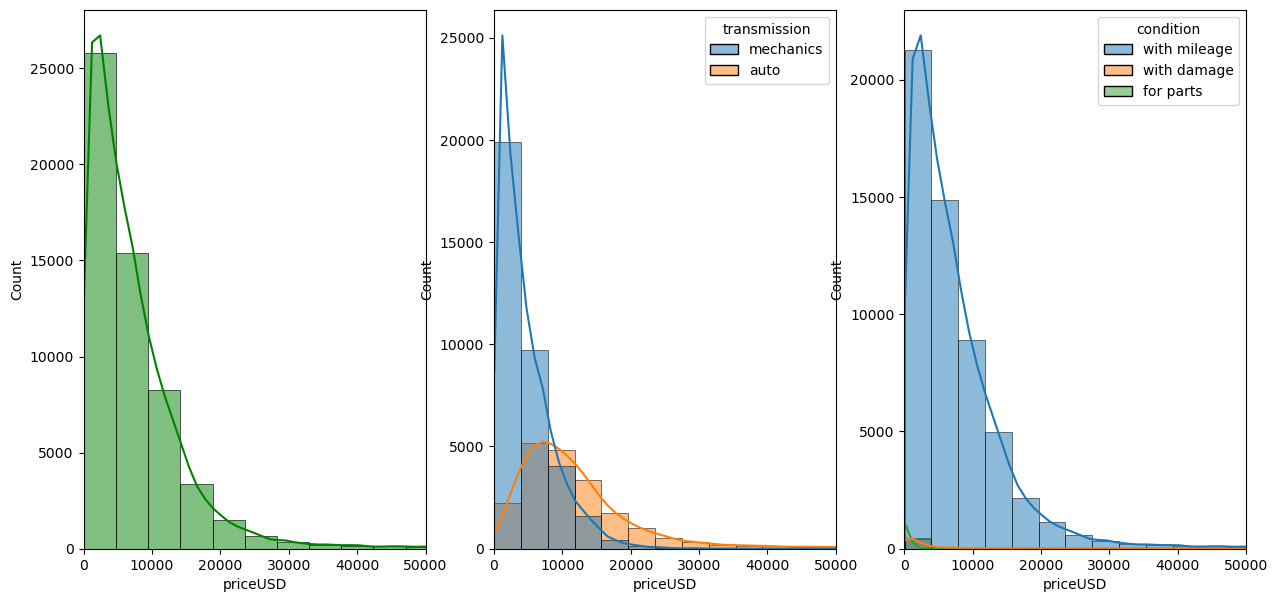

In [36]:
# Visualize average score distribution to make some conclusion

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=df, x='priceUSD', bins=50, kde=True, color='g')
plt.xlim(0,50000)
plt.subplot(132)
sns.histplot(data=df, x='priceUSD', bins=60, kde=True, hue='transmission')
plt.xlim(0,50000)
plt.subplot(133)
sns.histplot(data=df, x='priceUSD', bins=60, kde=True, hue='condition')
plt.xlim(0,50000)
plt.show()

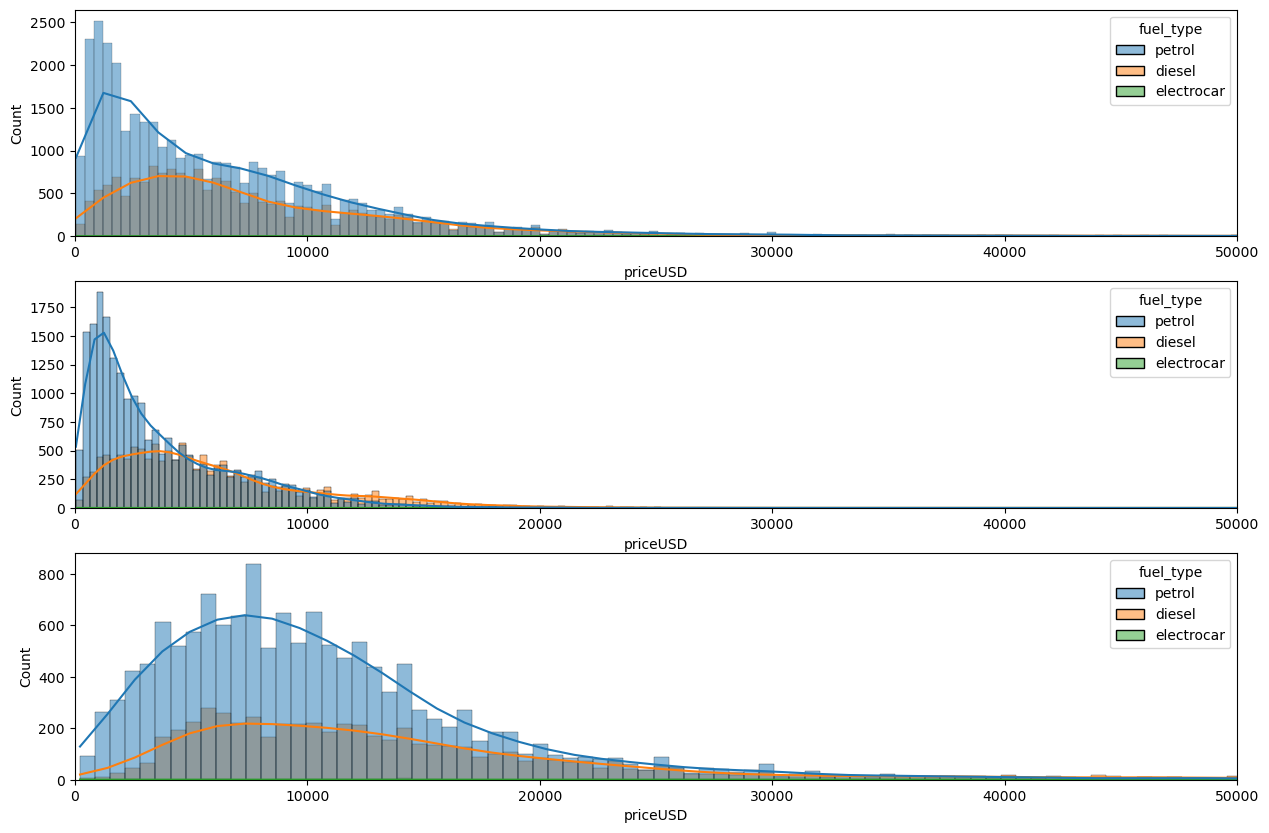

In [49]:
plt.subplots(1,3,figsize=(15,10))
plt.subplot(311)
sns.histplot(data=df,x='priceUSD',kde=True,hue='fuel_type')
plt.xlim(0,50000)

plt.subplot(312)
sns.histplot(data=df[df.transmission=='mechanics'],x='priceUSD', kde=True, hue='fuel_type')
plt.xlim(0,50000)

plt.subplot(313)
sns.histplot(data=df[df.transmission=='auto'],x='priceUSD', kde=True, hue='fuel_type')
plt.xlim(0,50000)

plt.show()